In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("preprocessed_data.csv")
print(df.shape)

# Separate features and target
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(4269, 12)


# KNN Classifier

In [3]:
best_k = 1
best_cv_acc = 0

print("KNN Cross-Validation Scores:")
for k in range(1, 101):
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    if ((k) % 10 == 0):
        print(f"k={k}: Mean CV Accuracy = {mean_score:.4f}")
    if mean_score > best_cv_acc:
        best_cv_acc = mean_score
        best_k = k

print(f"Best KNN Accuracy from CV: {best_cv_acc:.4f} with k = {best_k}")

KNN Cross-Validation Scores:
k=10: Mean CV Accuracy = 0.9154
k=20: Mean CV Accuracy = 0.9215
k=30: Mean CV Accuracy = 0.9260
k=40: Mean CV Accuracy = 0.9274
k=50: Mean CV Accuracy = 0.9283
k=60: Mean CV Accuracy = 0.9269
k=70: Mean CV Accuracy = 0.9271
k=80: Mean CV Accuracy = 0.9262
k=90: Mean CV Accuracy = 0.9253
k=100: Mean CV Accuracy = 0.9260
Best KNN Accuracy from CV: 0.9300 with k = 48


KNN Confusion Matrix:

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       318
           1       0.95      0.93      0.94       536

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



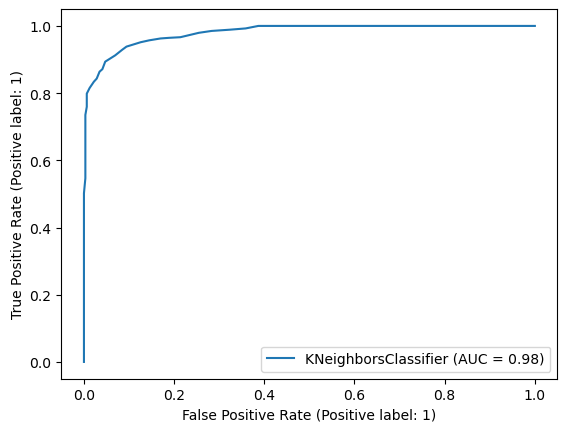

In [4]:
# Train final KNN model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Confusion matrix
print("KNN Confusion Matrix:")
confusion_matrix(y_test, y_pred_knn)

# Classification report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# ROC curve
RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [5]:
cm= confusion_matrix(y_test, y_pred_knn)

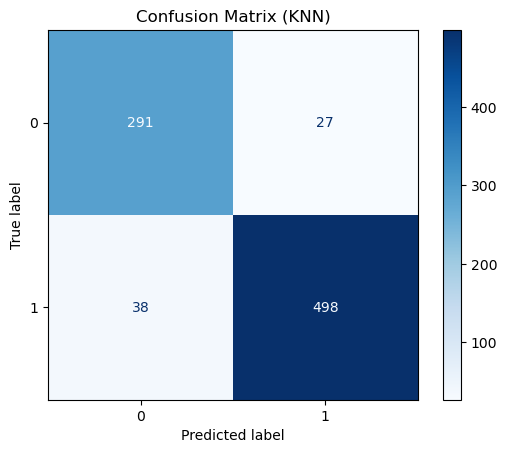

In [6]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (KNN)")
plt.show()

# Logistic regression

In [7]:
logreg = LogisticRegression(max_iter=1000)
logreg_cv_scores = cross_val_score(logreg, X, y, cv=5)

print(f"Logistic Regression CV Accuracy: {logreg_cv_scores.mean():.4f}")


Logistic Regression CV Accuracy: 0.9175


Logistic Regression Confusion Matrix:
[[275  43]
 [ 38 498]]

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854



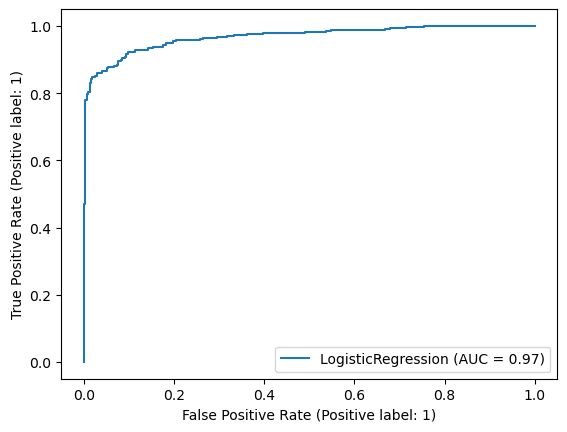

In [8]:
# Train final Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Confusion matrix
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# ROC curve
RocCurveDisplay.from_estimator(logreg, X_test, y_test)


In [9]:
lrcm = confusion_matrix(y_test, y_pred_logreg)

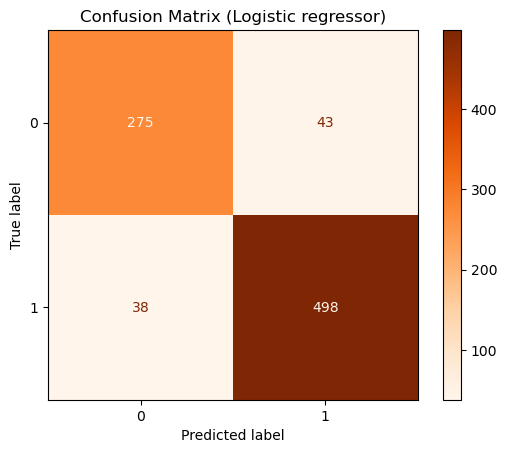

In [10]:
disp = ConfusionMatrixDisplay(confusion_matrix=lrcm)
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix (Logistic regressor)")
plt.show()